## INFORME DE ANÁLISIS EXPLORATORIO DE DATOS
### BMW Pricing Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### 1. Análisis inicial

In [3]:
# Importamos los datos a un DataFrame de pandas
bmw = pd.read_csv('dataset/bmw_pricing_v3.csv')

In [4]:
bmw.shape

(4843, 18)

In [5]:
bmw.sample(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
822,NaN,520,191841.0,135.0,2014-04-01,diesel,black,NaN,True,True,True,NaN,True,True,True,True,19300.0,2018-03-01
1993,NaN,116,146057.0,85.0,2012-06-01,diesel,NaN,NaN,False,True,False,NaN,False,False,True,False,8900.0,2018-03-01
4559,BMW,X1,134886.0,120.0,NaN,diesel,silver,suv,True,True,False,False,True,False,True,True,15200.0,2018-07-01
182,BMW,520,146528.0,140.0,2014-07-01,diesel,NaN,NaN,True,True,True,NaN,False,False,True,NaN,18600.0,2018-08-01
233,BMW,520,173446.0,135.0,2013-02-01,diesel,black,estate,True,True,False,NaN,True,False,True,False,15600.0,2018-01-01


In [6]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [7]:
bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [10]:
bmw.describe(include=[object])

,marca,modelo,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,fecha_venta
count,3873,4840,2420,4838,4398,3383,4839,4357,4841,1452,4841,4115,4115,4842
unique,1,76,180,5,10,8,2,2,2,2,2,2,2,13
top,BMW,320,2013-07-01,diesel,black,estate,True,True,False,False,False,False,True,2018-05-01
freq,3873,752,93,4631,1499,1107,2662,3465,3864,1150,2612,3119,2240,809


### 2. Análisis de duplicados

In [11]:
bmw.duplicated().value_counts()

False    4843
Name: count, dtype: int64

In [13]:
bmw[bmw.duplicated()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


No hay registros duplicados

### 3. Tratamiento de datos nulos

In [14]:
bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.1- MARCA

In [16]:
bmw.marca.unique()

array([nan, 'BMW'], dtype=object)

In [18]:
round(bmw.marca.value_counts(dropna=False, normalize=True) * 100, 2)

marca
BMW    79.97
NaN    20.03
Name: proportion, dtype: float64

In [19]:
# Copia de seguridad
bmw2 = bmw.copy()

Esta columna no aporta información y contiene muchos nulos. Se elimina

In [20]:
# Eliminamos la columna
del(bmw2['marca'])

In [21]:
bmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


- 3.2- FECHA_REGISTRO

In [22]:
round(bmw2.fecha_registro.value_counts(dropna=False, normalize=True) * 100, 2)

fecha_registro
NaN           50.03
2013-07-01     1.92
2014-03-01     1.71
2014-05-01     1.67
2013-01-01     1.61
2013-10-01     1.59
2014-02-01     1.53
2013-06-01     1.38
2014-01-01     1.38
2013-02-01     1.38
2013-11-01     1.26
2012-10-01     1.26
2013-04-01     1.22
2014-04-01     1.20
2013-09-01     1.20
2013-03-01     1.20
2013-08-01     1.12
2012-06-01     1.12
2014-07-01     1.12
2014-09-01     1.01
2013-05-01     0.95
2014-08-01     0.93
2012-11-01     0.89
2012-03-01     0.87
2014-06-01     0.85
2013-12-01     0.83
2012-01-01     0.72
2014-10-01     0.72
2014-11-01     0.70
2012-04-01     0.70
2012-07-01     0.68
2012-09-01     0.66
2012-08-01     0.60
2015-03-01     0.58
2012-05-01     0.56
2012-12-01     0.54
2012-02-01     0.39
2015-06-01     0.39
2015-10-01     0.39
2015-01-01     0.37
2015-05-01     0.37
2014-12-01     0.29
2015-04-01     0.29
2011-10-01     0.29
2011-06-01     0.29
2011-05-01     0.25
2015-07-01     0.25
2011-12-01     0.25
2011-09-01     0.23
2011-

La columna contiene demasiados nulos. Se elimina

In [23]:
bmw3 = bmw2.copy()

In [24]:
del(bmw3['fecha_registro'])

In [25]:
bmw3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [26]:
bmw3.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.3- COLOR

In [27]:
round(bmw3.color.value_counts(dropna=False, normalize=True) * 100, 2)

color
black     30.95
grey      22.09
blue      13.36
white      9.99
NaN        9.19
brown      6.24
silver     6.03
red        0.97
beige      0.76
green      0.29
orange     0.12
Name: proportion, dtype: float64

9,19% de nulos de la muestra total. No se eliminan, sino que se imputa el valor 'otros'

In [28]:
bmw4 = bmw3.copy()

In [29]:
# Se imputa a los nulos el valor 'otros'
bmw4['color'].fillna('otros', inplace=True)

In [30]:
round(bmw4['color'].value_counts(dropna=False, normalize=True) * 100, 2)

color
black     30.95
grey      22.09
blue      13.36
white      9.99
otros      9.19
brown      6.24
silver     6.03
red        0.97
beige      0.76
green      0.29
orange     0.12
Name: proportion, dtype: float64

In [31]:
bmw4.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.4- TIPO_COCHE

In [32]:
round(bmw4.tipo_coche.value_counts(dropna=False, normalize=True) * 100, 2)

tipo_coche
NaN            30.15
estate         22.86
sedan          16.95
suv            15.59
hatchback      10.08
subcompact      1.59
coupe           1.57
convertible     0.62
van             0.60
Name: proportion, dtype: float64

Hay un 30,15% de nulos, pero la columna es significativa. Se intentará imputar valores a los registros nulos

In [33]:
bmw4.tipo_coche.value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [50]:
bmw4.groupby(['modelo', 'potencia', 'tipo_coche'], dropna=False)[['modelo']].count()

modelo
modelo            potencia tipo_coche         
 Active Tourer    100.0    van               1
114               70.0     hatchback         3
                           subcompact        4
                           NaN               3
                  75.0     hatchback         3
                           NaN               2
116               80.0     estate            1
                           hatchback         2
                           subcompact        1
                  85.0     estate            1
                           hatchback       182
                           sedan             3
                           subcompact       55
                           NaN             104
                  87.0     hatchback         1
                  90.0     hatchback         1
                           NaN               1
                  100.0    hatchback         3
                           NaN               1
                  101.0    hatchback         1
                  105.0    hatchback         1
118               90.0     hatchback         8
                           subcompact        3
                           NaN               5
                  95.0     subcompact        1
                           NaN               1
                  100.0    coupe             1
                           hatchback        16
                           subcompact        3
                           NaN              12
                  105.0    convertible       1
                           coupe             1
                           hatchback        37
                           sedan             3
                           subcompact        5
                           NaN              19
                  110.0    hatchback        17
                           NaN               7
                  125.0    subcompact        1
                           NaN               1
                  127.0    hatchback         1
120               110.0    hatchback         1
                  120.0    convertible       2
                           subcompact        1
                           NaN               1
                  130.0    convertible       2
                           hatchback         2
                           NaN               2
                  135.0    hatchback        11
                           sedan             1
                           subcompact        1
                           NaN               9
                  140.0    hatchback         2
                  142.0    NaN               1
123               150.0    hatchback         1
                           NaN               1
125               155.0    hatchback         1
                  160.0    hatchback         4
135               225.0    convertible       1
                           coupe             1
                  235.0    hatchback         2
214 Gran Tourer   70.0     van               1
216               85.0     van               1
216 Active Tourer 85.0     van               3
216 Gran Tourer   85.0     van               1
                           NaN               3
218               100.0    convertible       2
                           coupe             1
                           NaN               1
                  105.0    coupe             1
                           NaN               1
                  110.0    convertible       1
                           van               2
                           NaN               3
218 Active Tourer 100.0    van               4
                           NaN               2
                  110.0    van               4
                           NaN               1
                  112.0    van               2
218 Gran Tourer   85.0     NaN               1
                  100.0    van               1
                  110.0    van               4
                           NaN               3
220               135.0    convertible       

Hay demasiada variabilidad para imputar valores manualmente. Se le imputa el valor 'otros'

In [51]:
bmw5 = bmw4.copy()

In [52]:
bmw5.tipo_coche.fillna('otros', inplace=True)

In [53]:
round(bmw5.tipo_coche.value_counts(dropna=False, normalize=True) * 100, 2)

tipo_coche
otros          30.15
estate         22.86
sedan          16.95
suv            15.59
hatchback      10.08
subcompact      1.59
coupe           1.57
convertible     0.62
van             0.60
Name: proportion, dtype: float64

In [54]:
bmw5.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                        0
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.5- AIRE ACONDICIONADO

In [55]:
round(bmw5.aire_acondicionado.value_counts(dropna=False, normalize=True) * 100, 2)

aire_acondicionado
True     71.55
False    18.42
NaN      10.04
Name: proportion, dtype: float64

Hay un 10% de nulos. Se imputa el valor 'sin_info'

In [56]:
bmw6 = bmw5.copy()

In [57]:
bmw6.aire_acondicionado.fillna('sin_info', inplace=True)

In [58]:
round(bmw6.aire_acondicionado.value_counts(dropna=False,normalize=True)*100, 2)

aire_acondicionado
True        71.55
False       18.42
sin_info    10.04
Name: proportion, dtype: float64

In [59]:
bmw6.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                        0
volante_regulable                 4
aire_acondicionado                0
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

- 3.6- ASIENTOS_TRASEROS_PLEGABLES

In [60]:
round(bmw6.asientos_traseros_plegables.value_counts(dropna=False,normalize=True)*100, 2)

asientos_traseros_plegables
NaN      70.02
False    23.75
True      6.24
Name: proportion, dtype: float64

Hay demasiados nulos. Se elimina la columna

In [61]:
bmw7 = bmw6.copy()

In [62]:
del(bmw7['asientos_traseros_plegables'])

In [63]:
bmw7.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,diesel,black,otros,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,diesel,white,otros,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,diesel,silver,otros,True,True,False,False,True,True,True,33400.0,2018-04-01


In [64]:
bmw7.isnull().sum()

modelo                    3
km                        2
potencia                  1
tipo_gasolina             5
color                     0
tipo_coche                0
volante_regulable         4
aire_acondicionado        0
camara_trasera            2
elevalunas_electrico      2
bluetooth               728
gps                       0
alerta_lim_velocidad    728
precio                    6
fecha_venta               1
dtype: int64

- 3.7- BLUETOOTH

In [65]:
round(bmw7.bluetooth.value_counts(dropna=False,normalize=True)*100, 2)

bluetooth
False    64.40
True     20.57
NaN      15.03
Name: proportion, dtype: float64

Hay un 15% de nulos. Se imputa el valor 'sin_info'

In [68]:
bmw8 = bmw7.copy()

In [69]:
bmw8.bluetooth.fillna('sin_info', inplace=True)

In [70]:
round(bmw8.bluetooth.value_counts(dropna=False, normalize=True) * 100, 2)

bluetooth
False       64.40
True        20.57
sin_info    15.03
Name: proportion, dtype: float64

In [71]:
bmw8.isnull().sum()

modelo                    3
km                        2
potencia                  1
tipo_gasolina             5
color                     0
tipo_coche                0
volante_regulable         4
aire_acondicionado        0
camara_trasera            2
elevalunas_electrico      2
bluetooth                 0
gps                       0
alerta_lim_velocidad    728
precio                    6
fecha_venta               1
dtype: int64

- 3.8- ALERTA_LIM_VELOCIDAD

In [72]:
round(bmw8.alerta_lim_velocidad.value_counts(dropna=False,normalize=True)*100, 2)

alerta_lim_velocidad
True     46.25
False    38.72
NaN      15.03
Name: proportion, dtype: float64

Hay un 15% de nulos. Se imputa el valor 'sin_info'

In [73]:
bmw9 = bmw8.copy()

In [74]:
bmw9.alerta_lim_velocidad.fillna('sin_info', inplace=True)

In [75]:
round(bmw9.alerta_lim_velocidad.value_counts(dropna=False, normalize=True) * 100, 2)

alerta_lim_velocidad
True        46.25
False       38.72
sin_info    15.03
Name: proportion, dtype: float64

In [76]:
bmw9.isnull().sum()

modelo                  3
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

3.9- Categorías con pocos nulos

- 3.9.1- MODELO

In [77]:
bmw9[bmw9.modelo.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,diesel,black,otros,False,True,False,False,sin_info,True,sin_info,13300.0,2018-08-01
4766,NaN,115566.0,105.0,diesel,silver,suv,False,True,False,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,diesel,white,otros,False,False,False,False,False,False,False,800.0,2018-03-01


Se evalúan los 3 registros nulos de forma individual

In [78]:
# Vehículo índice 173
round(bmw9[(bmw9['potencia']==105) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==True)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['volante_regulable']==False)&(bmw9['gps']==True)]['modelo'].value_counts(normalize=True)*100, 2)

modelo
318                 63.11
X1                  11.65
118                 10.68
318 Gran Turismo     9.71
X3                   3.88
525                  0.97
Name: proportion, dtype: float64

In [79]:
# Se imputa el modelo 318 por probabilidad
bmw9.loc[173, 'modelo'] = '318'

In [81]:
# Comprobación
bmw9.loc[[173]]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,318,146338.0,105.0,diesel,black,otros,False,True,False,False,sin_info,True,sin_info,13300.0,2018-08-01


In [82]:
bmw9[bmw9.modelo.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4766,NaN,115566.0,105.0,diesel,silver,suv,False,True,False,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,diesel,white,otros,False,False,False,False,False,False,False,800.0,2018-03-01


In [ ]:
#Vehículo indice 4766
bmw9[(bmw9['potencia']==105) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==True)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==True)&(bmw9['volante_regulable']==False)&(bmw9['gps']==True)&(bmw9['tipo_coche']=='suv')&(bmw9['bluetooth']==False)]['modelo'].value_counts(normalize=True)*100

modelo
X1    62.5
X3    37.5
Name: proportion, dtype: float64

In [83]:
# Se imputa el modelo X1 por probabilidad
bmw9.loc[4766, 'modelo'] = 'X1'

In [84]:
# Comprobación
bmw9.loc[[4766]]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4766,X1,115566.0,105.0,diesel,silver,suv,False,True,False,True,False,True,False,14900.0,2018-09-01


In [85]:
bmw9[bmw9.modelo.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4802,NaN,118640.0,110.0,diesel,white,otros,False,False,False,False,False,False,False,800.0,2018-03-01


In [86]:
# Vehículo índice 4802
round(bmw9[(bmw9['potencia']==110) & (bmw9['tipo_gasolina']=='diesel')&(bmw9['aire_acondicionado']==False)&(bmw9['camara_trasera']==False)&(bmw9['elevalunas_electrico']==False)&(bmw9['volante_regulable']==False)&(bmw9['gps']==False)&(bmw9['bluetooth']==False)]['modelo'].value_counts(normalize=True)*100, 2)

modelo
X3     33.33
218    33.33
318    16.67
X1     16.67
Name: proportion, dtype: float64

Dado que no hay un modelo con mayor probabilidad, se elimina el registro

In [87]:
bmw9.drop(index=4802, inplace=True)

In [88]:
bmw9[bmw9.modelo.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [89]:
bmw9.isnull().sum()

modelo                  0
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

- 3.9.2- KM

In [90]:
bmw9[bmw9.km.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,520,NaN,135.0,diesel,black,otros,True,True,True,True,True,True,True,20300.0,2018-02-01
4811,X3,NaN,190.0,diesel,blue,van,True,True,True,True,False,True,True,19500.0,2018-07-01


No hay manera de deducir unos valores fiables para imputar a los registros nulos. Por lo tanto, se eliminan

In [91]:
bmw9.dropna(subset='km', inplace=True)

In [92]:
bmw9[bmw9.km.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [93]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

- 3.9.3- POTENCIA

In [94]:
bmw9[bmw9.potencia.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,525,106054.0,NaN,diesel,black,estate,False,True,False,False,False,True,True,18700.0,2018-03-01


In [108]:
#Podemos deducir la potencia segun modelo y otras variables?
modelo_181 = '525'
tipo_gasolina_181 = 'diesel'
tipo_coche_181 = 'estate'
volante_regulable_181 = False
aire_acondicionado_181 = True
elevalunas_electrico_181 = False
filtro = (bmw9.modelo == modelo_181) & (bmw9.tipo_gasolina == tipo_gasolina_181) & (bmw9.tipo_coche == tipo_coche_181) & (bmw9.volante_regulable == volante_regulable_181) & (bmw9.aire_acondicionado == aire_acondicionado_181) & (bmw9.elevalunas_electrico == elevalunas_electrico_181)
bmw9[['potencia', 'modelo', 'tipo_gasolina', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'elevalunas_electrico']][filtro].value_counts().reset_index()

,potencia,modelo,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,elevalunas_electrico,count
0,160.0,525,diesel,estate,False,True,False,4


In [109]:
# Se imputa el valor
bmw9.loc[181, 'potencia'] = 160

In [110]:
# Comprobación
bmw9.loc[[181]]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,525,106054.0,160.0,diesel,black,estate,False,True,False,False,False,True,True,18700.0,2018-03-01


In [111]:
bmw9[bmw9.potencia.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [5]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

- 3.9.4- TIPO_GASOLINA

In [13]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,NaN,black,otros,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,NaN,white,estate,False,False,False,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,NaN,black,estate,True,True,False,False,False,True,True,15400.0,2018-02-01
479,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
629,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [20]:
#Evaluamos el modelo 420 (indice 82) para ver si podemos imputar el tipo_gasolina
bmw9[['modelo','potencia','tipo_gasolina']][(bmw9['modelo']=='420')&(bmw9['potencia']==135.0)].value_counts().reset_index()

,modelo,potencia,tipo_gasolina,count
0,420,135.0,diesel,26
1,420,135.0,petrol,2


In [21]:
# Imputamos el valor 'diesel'
bmw9.loc[[82],['tipo_gasolina']]='diesel'
# Comprobación
bmw9.loc[[82],['tipo_gasolina']]

,tipo_gasolina
82,diesel


In [22]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
185,320,186697.0,135.0,NaN,white,estate,False,False,False,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,NaN,black,estate,True,True,False,False,False,True,True,15400.0,2018-02-01
479,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
629,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [23]:
#Evaluamos el modelo 320 (indice 185) para ver si podemos imputar el tipo_gasolina
bmw9[['modelo','potencia','tipo_gasolina']][(bmw9['modelo']=='320')&(bmw9['potencia']==135.0)].value_counts().reset_index()

,modelo,potencia,tipo_gasolina,count
0,320,135.0,diesel,297
1,320,135.0,petrol,13


In [24]:
# Imputamos el valor 'diesel'
bmw9.loc[[185],['tipo_gasolina']]='diesel'
# Comprobación
bmw9.loc[[185],['tipo_gasolina']]

,tipo_gasolina
185,diesel


In [25]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
444,318,111622.0,100.0,NaN,black,estate,True,True,False,False,False,True,True,15400.0,2018-02-01
479,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
629,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [26]:
#Evaluamos el modelo 318  con potencia 100 (indice 444) para ver si podemos imputar el tipo_gasolina
bmw9[['modelo','potencia','tipo_gasolina']][(bmw9['modelo']=='318')&(bmw9['potencia']==100.0)].value_counts().reset_index()

,modelo,potencia,tipo_gasolina,count
0,318,100.0,diesel,305
1,318,100.0,petrol,3


In [27]:
# Imputamos el valor 'diesel'
bmw9.loc[[444],['tipo_gasolina']]='diesel'
# Comprobación
bmw9.loc[[444],['tipo_gasolina']]

,tipo_gasolina
444,diesel


In [28]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
479,318,170350.0,105.0,NaN,white,otros,False,True,False,False,False,True,False,10200.0,2018-02-01
629,318,147558.0,105.0,NaN,white,estate,False,sin_info,False,False,False,False,True,100.0,2018-03-01


In [29]:
#Evaluamos los modelos 318 con potencia 105 (indices 479 y 629) para ver si podemos imputar el tipo_gasolina
bmw9[['modelo','potencia','tipo_gasolina']][(bmw9['modelo']=='318')&(bmw9['potencia']==105.0)].value_counts().reset_index()

,modelo,potencia,tipo_gasolina,count
0,318,105.0,diesel,209
1,318,105.0,petrol,3
2,318,105.0,Diesel,1


In [30]:
# Imputamos el valor 'diesel'
bmw9.loc[[479, 629],['tipo_gasolina']]='diesel'
# Comprobación
bmw9.loc[[479, 629],['tipo_gasolina']]

,tipo_gasolina
479,diesel
629,diesel


In [31]:
bmw9[bmw9.tipo_gasolina.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [32]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

- 3.9.5- VOLANTE_REGULABLE

In [33]:
bmw9[bmw9['volante_regulable'].isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
66,320,93066.0,135.0,diesel,black,coupe,NaN,False,False,True,False,True,sin_info,11900.0,2018-06-01
273,318,195032.0,100.0,diesel,grey,otros,NaN,sin_info,False,False,False,True,False,4900.0,2018-01-01
488,320,227691.0,135.0,diesel,black,otros,NaN,True,False,False,True,True,False,10500.0,2018-02-01
613,318,201626.0,105.0,diesel,black,otros,NaN,sin_info,False,True,False,True,True,11700.0,2018-03-01


In [34]:
#Evaluamos el modelo 320 (indice 66) para ver si podemos imputar el volante_regulable
bmw9[['volante_regulable','tipo_gasolina','modelo','potencia','tipo_coche','camara_trasera']][(bmw9['modelo']=='320')&(bmw9['potencia']==135)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='coupe')&(bmw9['camara_trasera']==False)].value_counts(normalize=True).reset_index()

,volante_regulable,tipo_gasolina,modelo,potencia,tipo_coche,camara_trasera,proportion
0,False,diesel,320,135.0,coupe,False,0.5
1,True,diesel,320,135.0,coupe,False,0.5


Ya que esta variable no se relaciona con las demás características del vehículo, no se puede imputar un valor fiable. Se eliminan los registros nulos.

In [35]:
bmw9.dropna(subset='volante_regulable', inplace=True)

In [36]:
bmw9[bmw9.volante_regulable.isna()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [38]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

- 3.9.6- CAMARA_TRASERA

In [39]:
bmw9[bmw9.camara_trasera.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
291,520,163675.0,135.0,diesel,otros,estate,True,True,NaN,True,sin_info,True,True,14900.0,2018-01-01
409,316,160619.0,85.0,diesel,black,estate,False,True,NaN,True,sin_info,True,sin_info,11700.0,2018-04-01


In [40]:
#Evaluamos el modelo 520 (indice 291) para ver si podemos imputar la camara_trasera
bmw9[['camara_trasera','modelo', 'potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='520')&(bmw9['potencia']==135)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')].value_counts(normalize=True).reset_index()

,camara_trasera,modelo,potencia,tipo_gasolina,tipo_coche,proportion
0,False,520,135.0,diesel,estate,0.709677
1,True,520,135.0,diesel,estate,0.290323


In [41]:
# Imputamos el valor False
bmw9.loc[[291],['camara_trasera']]=False
# Comprobación
bmw9.loc[291]['camara_trasera']

False

In [42]:
bmw9[bmw9.camara_trasera.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
409,316,160619.0,85.0,diesel,black,estate,False,True,NaN,True,sin_info,True,sin_info,11700.0,2018-04-01


In [43]:
#Evaluamos el modelo 316 (indice 409) para ver si podemos imputar la camara_trasera
bmw9[['camara_trasera','modelo', 'potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='316')&(bmw9['potencia']==85)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')].value_counts(normalize=True).reset_index()

,camara_trasera,modelo,potencia,tipo_gasolina,tipo_coche,proportion
0,False,316,85.0,diesel,estate,0.948718
1,True,316,85.0,diesel,estate,0.051282


In [44]:
# Imputamos el valor False
bmw9.loc[[409],['camara_trasera']]=False
# Comprobación
bmw9.loc[409]['camara_trasera']

False

In [45]:
bmw9[bmw9.camara_trasera.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [46]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

- 3.9.7- ELEVALUNAS_ELECTRICO

In [47]:
bmw9[bmw9.elevalunas_electrico.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
63,640,69695.0,230.0,diesel,otros,coupe,True,True,False,NaN,True,True,True,36300.0,2018-02-01
305,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,2018-01-01


In [48]:
# Evaluamos el modelo 640 (indice 63) para ver si podemos imputar los elevalunas_electricos
bmw9[['elevalunas_electrico','modelo','potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='640')&(bmw9['potencia']==230)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='coupe')].value_counts(normalize=True).reset_index()

,elevalunas_electrico,modelo,potencia,tipo_gasolina,tipo_coche,proportion
0,True,640,230.0,diesel,coupe,1.0


In [53]:
# Imputamos el valor True
bmw9.loc[[63],['elevalunas_electrico']]=True
# Comprobación
bmw9.loc[63,'elevalunas_electrico']

True

In [50]:
bmw9[bmw9.elevalunas_electrico.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
305,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,2018-01-01


In [51]:
# Evaluamos el modelo 535 (indice 305) para ver si podemos imputar los elevalunas_electricos
bmw9[['elevalunas_electrico','modelo','potencia','tipo_gasolina','tipo_coche']][(bmw9['modelo']=='535')&(bmw9['potencia']==230)&(bmw9['tipo_gasolina']=='diesel')&(bmw9['tipo_coche']=='estate')].value_counts(normalize=True).reset_index()

,elevalunas_electrico,modelo,potencia,tipo_gasolina,tipo_coche,proportion
0,True,535,230.0,diesel,estate,0.9
1,False,535,230.0,diesel,estate,0.1


In [54]:
# Imputamos el valor True
bmw9.loc[[305],['elevalunas_electrico']]=True
# Comprobación
bmw9.loc[305,'elevalunas_electrico']

True

In [55]:
bmw9[bmw9.elevalunas_electrico.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [56]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  6
fecha_venta             1
dtype: int64

- 3.9.8- PRECIO

In [57]:
bmw9[bmw9.precio.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,420,174740.0,135.0,diesel,otros,coupe,True,True,True,True,True,True,True,NaN,2018-05-01
523,520,163803.0,135.0,diesel,grey,estate,False,True,True,False,False,True,False,NaN,2018-02-01
538,316,34489.0,85.0,diesel,black,estate,True,False,False,False,False,True,False,NaN,2018-02-01
548,318,157129.0,100.0,diesel,blue,estate,True,sin_info,True,True,False,True,True,NaN,2018-03-01
568,320,166866.0,120.0,diesel,blue,otros,True,True,False,True,True,True,True,NaN,2018-03-01
583,320,114771.0,135.0,diesel,blue,otros,False,True,False,False,False,True,False,NaN,2018-03-01


Ya que es la variable que queremos predecir (Target), eliminamos directamente los registros nulos.

In [58]:
bmw9.dropna(subset='precio', inplace=True)

In [59]:
bmw9.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             1
dtype: int64

- 3.9.9- FECHA_VENTA

In [60]:
bmw9[bmw9.fecha_venta.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
593,525,269290.0,120.0,diesel,silver,otros,True,False,True,False,False,True,True,4200.0,NaN


Como no hay forma de deducir la fecha de venta de un vehículo en base a las demás variables, eliminamos el registro nulo.

In [61]:
bmw9.dropna(subset='fecha_venta', inplace=True)

In [62]:
bmw9[bmw9.fecha_venta.isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


Se resetea el índice del DataFrame, ya que se han eliminado registros. De esta forma, habrá una continuidad entre los índices

In [63]:
bmw10 = bmw9.copy()

In [64]:
bmw10.reset_index(drop=True, inplace=True)

In [65]:
bmw10.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

Se guarda el dataset limpio sin nulos

In [67]:
bmw10.to_csv('dataset/bmw_pricing_clean.csv', index=False)

### 4. Análisis Univariable

In [68]:
bmw10 = pd.read_csv('dataset/bmw_pricing_clean.csv')

In [69]:
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4829 non-null   object 
 1   km                    4829 non-null   float64
 2   potencia              4829 non-null   float64
 3   tipo_gasolina         4829 non-null   object 
 4   color                 4829 non-null   object 
 5   tipo_coche            4829 non-null   object 
 6   volante_regulable     4829 non-null   bool   
 7   aire_acondicionado    4829 non-null   object 
 8   camara_trasera        4829 non-null   bool   
 9   elevalunas_electrico  4829 non-null   bool   
 10  bluetooth             4829 non-null   object 
 11  gps                   4829 non-null   bool   
 12  alerta_lim_velocidad  4829 non-null   object 
 13  precio                4829 non-null   float64
 14  fecha_venta           4829 non-null   object 
dtypes: bool(4), float64(3

4.1- Evaluamos si hay variables que se puedan convertir a booleanas

volante_regulable solo tiene 2 valores (True y False). Se convierte a booleana

In [70]:
bmw10['volante_regulable'].unique()

array([ True, False])

In [71]:
bmw10['volante_regulable'] = bmw10['volante_regulable'].astype(bool)

aire_acondicionado tiene 3 valores. No se convierte

In [72]:
bmw10['aire_acondicionado'].unique()

array(['True', 'False', 'sin_info'], dtype=object)

camara_trasera tiene 2 valores (True y False). Se convierte a booleana

In [73]:
bmw10['camara_trasera'].unique()

array([False,  True])

In [74]:
bmw10['camara_trasera'] = bmw10['camara_trasera'].astype(bool)

elevalunas_electrico tiene 2 valores (True y False). Se convierte a booleana

In [75]:
bmw10['elevalunas_electrico'].unique()

array([ True, False])

In [76]:
bmw10['elevalunas_electrico'] = bmw10['elevalunas_electrico'].astype(bool)

bluetooth tiene 3 valores. No se convierte

In [77]:
bmw10['bluetooth'].unique()

array(['sin_info', 'True', 'False'], dtype=object)

alerta_lim_velocidad tiene 3 valores. No se convierte

In [78]:
bmw10['alerta_lim_velocidad'].unique()

array(['sin_info', 'True', 'False'], dtype=object)

In [79]:
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4829 non-null   object 
 1   km                    4829 non-null   float64
 2   potencia              4829 non-null   float64
 3   tipo_gasolina         4829 non-null   object 
 4   color                 4829 non-null   object 
 5   tipo_coche            4829 non-null   object 
 6   volante_regulable     4829 non-null   bool   
 7   aire_acondicionado    4829 non-null   object 
 8   camara_trasera        4829 non-null   bool   
 9   elevalunas_electrico  4829 non-null   bool   
 10  bluetooth             4829 non-null   object 
 11  gps                   4829 non-null   bool   
 12  alerta_lim_velocidad  4829 non-null   object 
 13  precio                4829 non-null   float64
 14  fecha_venta           4829 non-null   object 
dtypes: bool(4), float64(3

4.2- Listamos las variables según si son numéricas, booleanas o categóricas

In [81]:
target= ["precio"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [82]:
num, bol, cat = obtener_lista_variables(bmw10)

In [83]:
num

['km', 'potencia']

In [84]:
bol

['volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'gps']

In [85]:
cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta']

4.3- Variables numéricas

In [86]:
bmw10[num].describe()

,km,potencia
count,4.829000e+03,4829.000000
mean,1.409126e+05,129.001864
std,6.020077e+04,39.026898
min,-6.400000e+01,0.000000
25%,1.028560e+05,100.000000
50%,1.410630e+05,120.000000
75%,1.751740e+05,135.000000
max,1.000376e+06,423.000000


Se observa que 'km' tiene valores negativos y puede tener outliers

'potencia' tiene un 0 como valor mínimo, lo que parece extraño y podría considerarse como outlier. El valor máximo también podría serlo.

- 4.3.1- KM

In [87]:
# Para optimizar procesamiento y memoria, se convierte a int32
bmw10['km'] = bmw10['km'].astype('int32')

<Axes: >

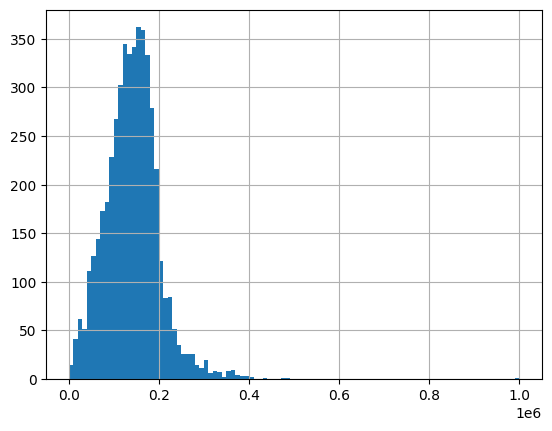

In [89]:
bmw10.km.hist(bins=100)

In [90]:
bmw10[['km']].describe()

,km
count,4.829000e+03
mean,1.409126e+05
std,6.020077e+04
min,-6.400000e+01
25%,1.028560e+05
50%,1.410630e+05
75%,1.751740e+05
max,1.000376e+06


In [91]:
bmw10[(bmw10['km'] < 0) | (bmw10['km'] > 1e+06)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2926,640 Gran Coupé,-64,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,2018-04-01
3720,118,1000376,90.0,diesel,otros,otros,True,False,False,False,sin_info,True,False,1400.0,2018-06-01


In [92]:
bmw11 = bmw10.copy()

In [93]:
#Eliminamos el valor negativo que no tiene sentido y el outlier
del_ind = bmw11[(bmw11['km']<0) | (bmw11['km']>1e+06)].index.tolist()
del_ind


[2926, 3720]

In [95]:
bmw11.drop(index=del_ind, inplace=True)

In [98]:
# Comprobación
bmw11[(bmw11['km'] < 0) | (bmw11['km'] > 1e+06)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


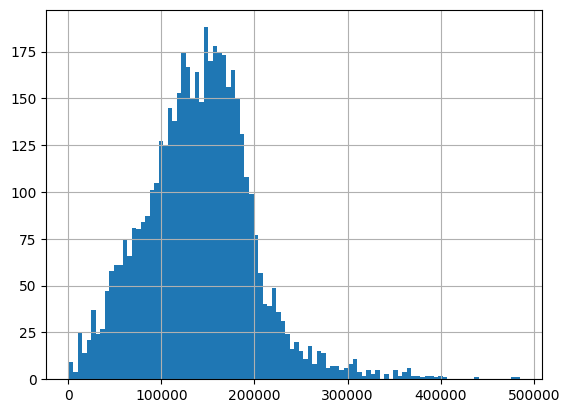

In [100]:
bmw11.km.hist(bins=100);

In [101]:
bmw11[['km']][bmw11['km'] > 4e+05]

,km
549,484615
1561,400654
2338,477571
2817,439060
3186,405816


In [103]:
# Se consideran outliers (>400.000 Km) y se eliminan
bmw11.drop(index=bmw11[bmw11['km'] > 4e+05].index.tolist(), inplace=True)

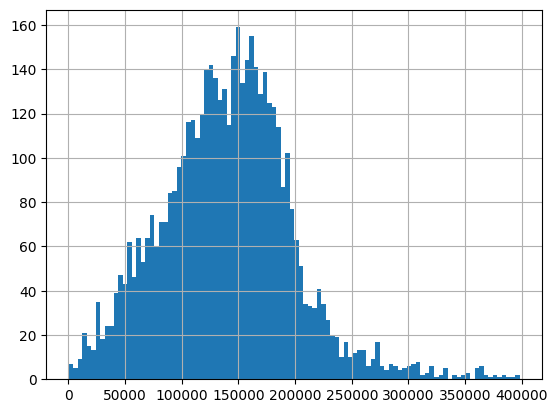

In [104]:
bmw11.km.hist(bins=100);

- 4.3.2- POTENCIA

In [106]:
bmw11[['potencia']].describe()

,potencia
count,4822.000000
mean,129.014932
std,39.013991
min,0.000000
25%,100.000000
50%,120.000000
75%,135.000000
max,423.000000


In [107]:
# Para optimizar el procesamiento y la memoria se convierte el tipo de dato a int16
bmw11['potencia'] = bmw11['potencia'].astype('int16')

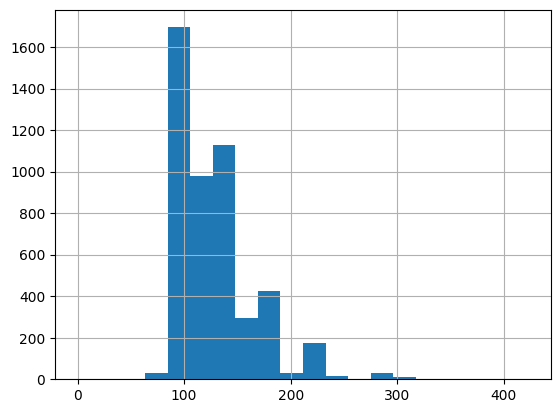

In [108]:
bmw11.potencia.hist(bins=20);

In [109]:
bmw12 = bmw11.copy()

In [110]:
# Vehículo con potencia 0
bmw12[bmw12['potencia'] == 0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3753,X1,81770,0,diesel,white,suv,False,False,False,False,False,False,sin_info,11700.0,2018-03-01


In [111]:
# Se considera anomalía y se elimina
bmw12.drop(index = bmw12[bmw12['potencia'] == 0].index, inplace=True)

In [113]:
# Comprobación
bmw12[bmw12['potencia'] == 0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [114]:
bmw12[['potencia']].describe()

,potencia
count,4821.000000
mean,129.041693
std,38.973751
min,25.000000
25%,100.000000
50%,120.000000
75%,135.000000
max,423.000000


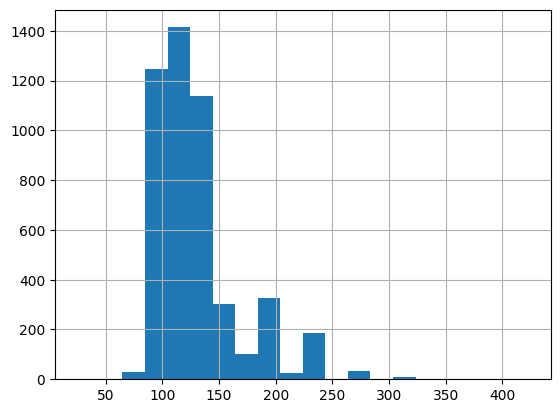

In [115]:
bmw12.potencia.hist(bins=20);

In [116]:
# Vehículos con potencia superior a 400
bmw12[bmw12['potencia'] > 400]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3589,M5,150187,412,petrol,white,sedan,True,True,True,True,True,True,True,41600.0,2018-09-01
4134,X6 M,2970,423,petrol,red,suv,True,sin_info,True,False,False,True,True,82400.0,2018-04-01


In [117]:
# Se consideran outliers y se eliminan
bmw12.drop(index = bmw12[bmw12['potencia'] > 400].index.tolist(), inplace=True)
# Comprobación
bmw12[bmw12['potencia'] > 400]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


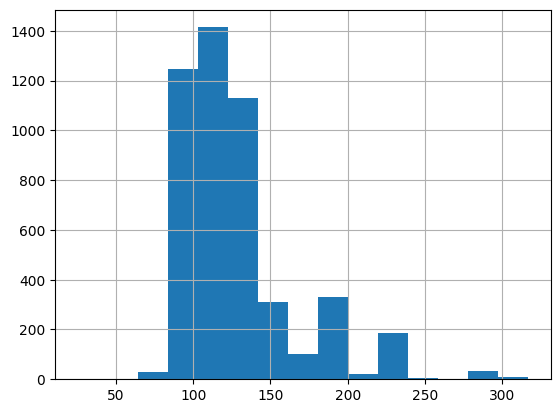

In [118]:
bmw12.potencia.hist(bins=15);

4.4- Variables booleanas

Al ser booleanas, no hay que hacerles ningún otro tratamiento ni evaluación

4.5- Variables categóricas

In [119]:
cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta']

- 4.5.1- MODELO

In [122]:
# Se muestran todos los valores para modelo
bmw12['modelo'].value_counts().reset_index()

,modelo,count
0,320,746
1,520,630
2,318,565
3,X3,437
4,116,358
5,X1,274
6,316,234
7,X5,231
8,525,182
9,530,157


In [123]:
# Hay un total de 75 modelos
len(bmw12.modelo.value_counts())

75

In [184]:
bmw13 = bmw12.copy()

Se agrupan los modelos utilizando el nombre genérico (p.ej. 318 Gran Turismo se agrupa en el modelo 318)

In [185]:
# Función para sustituir los valores de modelo por el modelo simplificado
def simplificar_modelos(df) -> pd.DataFrame:
    for i in df.index:
        modelo_simplificado = df.loc[i, 'modelo'].strip().split(' ')[0]
        df.loc[i, 'modelo'] = modelo_simplificado
    return df

In [186]:
bmw13 = simplificar_modelos(bmw13)

In [187]:
bmw13['modelo'].value_counts().reset_index()

,modelo,count
0,320,819
1,318,662
2,520,653
3,X3,437
4,116,358
5,X1,274
6,X5,251
7,316,234
8,525,182
9,530,175


In [188]:
# Se ha reducido de 75 a 54 modelos
len(bmw13.modelo.value_counts())

54

Se observa que hay modelos con muy poca representación. Los que tienen menos de 10 registros, se agrupan en la categoría 'otros' 

In [189]:
# Se crea un dataframe con el total de registros para cada modelo
contador_modelos = bmw13.modelo.value_counts().reset_index()

In [190]:
# Se crea una lista para los modelos que tienen menos de 10 registros
otros_modelos = contador_modelos[contador_modelos['count'] < 10].values[:, 0].tolist()
print(otros_modelos)

['216', '418', 'M3', 'Z4', 'i3', '430', '528', '125', '328', '135', '523', '220', 'M235', 'M4', '123', '750', '425', '225', '650', 'M135', '635', '630', 'i8', 'ActiveHybrid', '735', 'Active', '214']


In [191]:
# Hay un total de 92 registros en el dataframe principal con modelos de esta lista
bmw13[bmw13['modelo'].isin(otros_modelos)].shape[0]

92

In [192]:
# Se sustituyen estos modelos por la categoría 'otros'
bmw13['modelo'] = np.where(bmw13['modelo'].isin(otros_modelos), 'otros', bmw13['modelo'])

In [193]:
round(bmw13['modelo'].value_counts(normalize=True) * 100, 2)

modelo
320      17.00
318      13.74
520      13.55
X3        9.07
116       7.43
X1        5.69
X5        5.21
316       4.86
525       3.78
530       3.63
118       2.95
otros     1.91
420       1.58
518       1.37
X6        1.06
535       1.00
X4        0.95
330       0.75
120       0.75
218       0.71
730       0.68
640       0.54
325       0.48
740       0.37
114       0.31
M550      0.25
335       0.21
435       0.21
Name: proportion, dtype: float64

In [194]:
# Se ha reducido de 54 a 28 modelos relevantes
len(bmw13['modelo'].value_counts())

28

- 4.5.2- TIPO_GASOLINA

In [175]:
bmw13[['tipo_gasolina']].describe()

,tipo_gasolina
count,4819
unique,5
top,diesel
freq,4614


In [176]:
bmw13.tipo_gasolina.value_counts()

tipo_gasolina
diesel           4614
petrol            189
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

Se observa que existen las categorías 'diesel' y 'Diesel'. Se unifican.

In [195]:
bmw14 = bmw13.copy()

In [196]:
bmw14['tipo_gasolina']  = bmw14['tipo_gasolina'].str.lower()

In [197]:
bmw14.tipo_gasolina.value_counts()

tipo_gasolina
diesel           4619
petrol            189
hybrid_petrol       8
electro             3
Name: count, dtype: int64

Las categorías 'hybrid_petrol' y 'electro' tienen muy pocos registros, insignificantes respecto al total de la muestra. Se eliminan.

In [198]:
bmw14.drop(index = bmw14[bmw14['tipo_gasolina'].isin(['hybrid_petrol', 'electro'])].index, inplace=True)

In [199]:
bmw14['tipo_gasolina'].value_counts()

tipo_gasolina
diesel    4619
petrol     189
Name: count, dtype: int64

- 4.5.3- COLOR

In [200]:
bmw14[['color']].describe()

,color
count,4808
unique,11
top,black
freq,1488


In [201]:
bmw14.color.value_counts()

color
black     1488
grey      1063
blue       640
white      480
otros      443
brown      301
silver     290
red         46
beige       37
green       14
orange       6
Name: count, dtype: int64

Se observa que la distribución de colores es coherente, siendo mayor la frecuencia para los colores más comunes. Hay pocos registros con color Verde y Naranja, pero se decide mantenerlos.

- 4.5.4- TIPO_COCHE

In [202]:
bmw14[['tipo_coche']].describe()

,tipo_coche
count,4808
unique,9
top,otros
freq,1445


In [203]:
bmw14.tipo_coche.value_counts()

tipo_coche
otros          1445
estate         1102
sedan           817
suv             751
hatchback       485
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64

Se decide mantener las categorías de esta variable sin modificaciones

- 4.5.5- AIRE_ACONDICIONADO

In [204]:
bmw14[['aire_acondicionado']].describe()

,aire_acondicionado
count,4808
unique,3
top,True
freq,3445


In [208]:
round(bmw14.aire_acondicionado.value_counts(normalize=True) * 100, 2)

aire_acondicionado
True        71.65
False       18.34
sin_info    10.00
Name: proportion, dtype: float64

Se decide mantener las categorías de esta variable sin modificaciones

- 4.5.6- BLUETOOTH

In [206]:
bmw14[['bluetooth']].describe()

,bluetooth
count,4808
unique,3
top,False
freq,3097


In [209]:
round(bmw14.bluetooth.value_counts(normalize=True) * 100, 2)

bluetooth
False       64.41
True        20.57
sin_info    15.02
Name: proportion, dtype: float64

Se decide mantener las categorías de esta variable sin modificaciones

- 4.5.7- ALERTA_LIM_VELOCIDAD

In [210]:
bmw14[['alerta_lim_velocidad']].describe()

,alerta_lim_velocidad
count,4808
unique,3
top,True
freq,2222


In [211]:
round(bmw14.alerta_lim_velocidad.value_counts(normalize=True) * 100, 2)

alerta_lim_velocidad
True        46.21
False       38.73
sin_info    15.06
Name: proportion, dtype: float64

Se decide mantener las categorías de esta variable sin modificaciones

- 4.5.8- FECHA_VENTA

In [212]:
bmw14[['fecha_venta']].describe()

,fecha_venta
count,4808
unique,13
top,2018-05-01
freq,807


In [215]:
bmw14.fecha_venta.value_counts().reset_index().sort_values(by='fecha_venta')

,fecha_venta,count
9,2007-08-01,1
12,2008-06-01,1
11,2009-04-01,1
10,2010-04-01,1
8,2018-01-01,207
6,2018-02-01,497
1,2018-03-01,727
2,2018-04-01,685
0,2018-05-01,807
3,2018-06-01,600


Las fechas no tienen continuidad (hay registros antiguos y no está completo el año 2018) 

La fecha de venta no es significativa para el precio de venta

-> Se decide eliminar la columna

In [216]:
bmw15 = bmw14.copy()

In [217]:
del(bmw15['fecha_venta'])

In [218]:
bmw15.sample(5)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio
3003,518,112576,110,diesel,grey,otros,True,True,True,True,False,True,True,20300.0
4428,X3,178599,105,diesel,black,suv,False,True,False,False,sin_info,True,False,12600.0
4024,X3,88181,135,diesel,silver,otros,False,True,False,True,False,True,sin_info,18100.0
1028,520,159788,135,diesel,white,otros,False,True,False,True,sin_info,True,True,16400.0
1190,520,145045,120,diesel,black,otros,True,True,False,True,True,True,True,13700.0


4.6- Target

- 4.6.1- PRECIO

In [219]:
bmw15[['precio']].describe()

,precio
count,4808.000000
mean,15787.791181
std,9031.710234
min,100.000000
25%,10900.000000
50%,14200.000000
75%,18600.000000
max,178500.000000


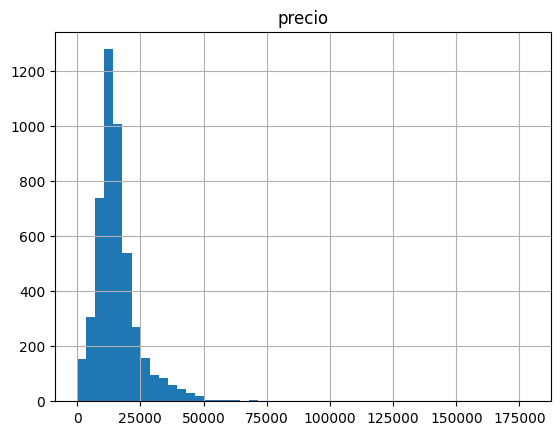

In [220]:
bmw15.hist('precio', bins=50);

<Axes: xlabel='precio'>

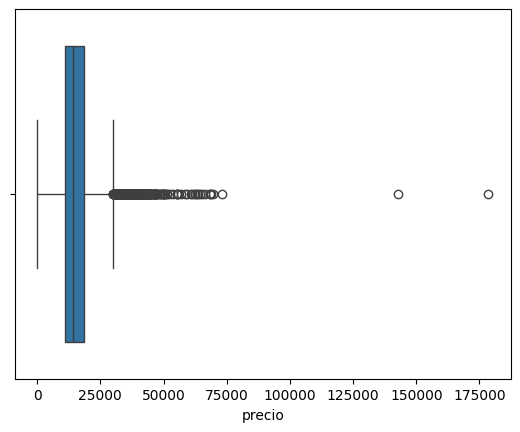

In [221]:
sns.boxplot(x=bmw15.precio)

Se observan outliers por encima de 70.000

In [224]:
bmw15[['precio']][bmw15['precio'] > 70000]

,precio
4672,142800.0
4719,73100.0
4741,178500.0


In [225]:
# Se eliminan los outliers
bmw15.drop(index = bmw15[bmw15['precio'] > 70000].index, inplace=True)
# Comprobación
bmw15[bmw15['precio'] > 70000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio


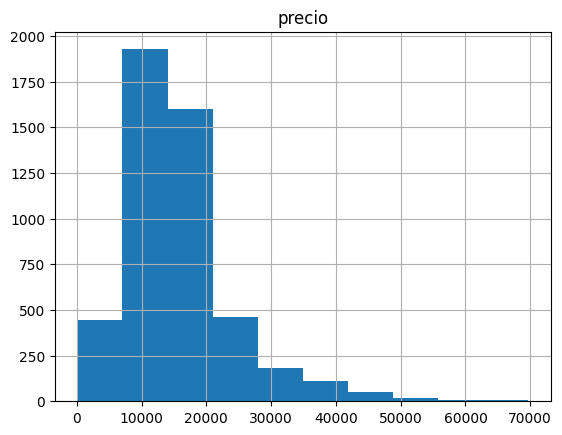

In [227]:
bmw15.hist('precio');

<Axes: xlabel='precio'>

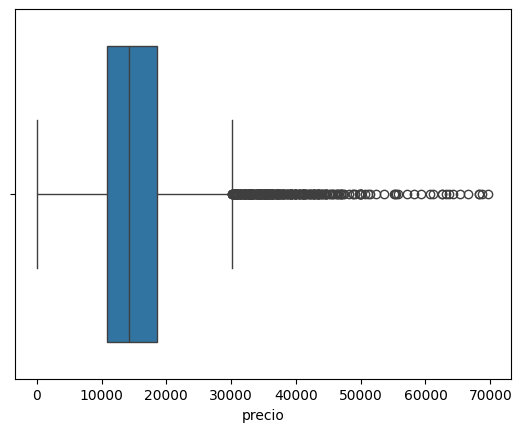

In [228]:
sns.boxplot(x = bmw15.precio)

In [229]:
bmw15[['precio']].describe()

,precio
count,4805.000000
mean,15715.567118
std,8489.088794
min,100.000000
25%,10900.000000
50%,14200.000000
75%,18600.000000
max,69700.000000


In [233]:
# Se observa que hay 58 registros con un precio inferior a 1000
# Se podrían eliminar, pero se decide mantenerlos

bmw15['modelo'][bmw15['precio'] < 1000].count()

58

In [234]:
bmw15.reset_index(drop=True, inplace=True)

### 5. Análisis de correlación inicial

### 6. Análisis Variable vs Target

- 6.1- Categóricas

- 6.2- Numéricas

- 6.3- Booleanas

### 7. Transformación de variables categóricas. OHE (One-Hot Encoding)

### 8. Normalización de variables numéricas. MinMaxScaler

### 9. Análisis de correlación final